In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
tweet = pd.read_csv('train_tweets.csv')

In [3]:
tweet.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
tweet.shape

(31962, 3)

In [5]:
#### dropping id column

tweet.drop('id', axis=1, inplace=True)

tweet.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [6]:
print(tweet['tweet'][0])

print('length : ',len(tweet['tweet'][0]))

 @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run
length :  102


In [7]:
# adding a length column

tweet['length'] = tweet['tweet'].apply(len)

In [8]:
tweet.head()

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39


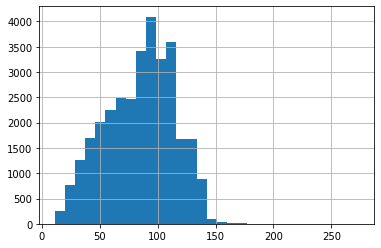

In [9]:

tweet['length'].hist(bins=30)
# most of the tweets are of length 60-120, with mean around 80.

Text(0.5, 0, 'tweet length')

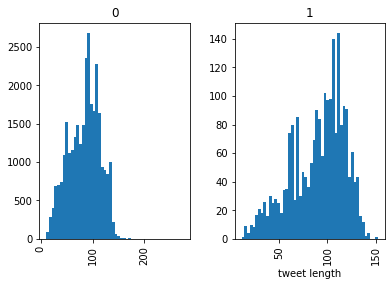

In [10]:
# ### relationship between tweet[sentiment] and tweet[length]

tweet['length'].hist(bins=50, by=tweet['label'])
plt.xlabel('tweet length')

Text(0.5, 1.0, 'label=1')

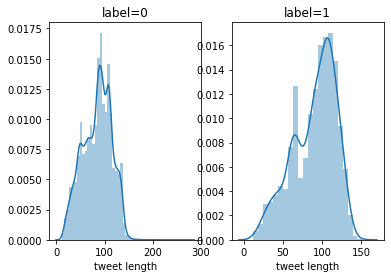

In [11]:
plt.subplot(1,2,1)
sns.distplot(tweet['length'][tweet['label']==0])
plt.xlabel('tweet length')
plt.title('label=0')

plt.subplot(1,2,2)
sns.distplot(tweet['length'][tweet['label']==1])
plt.xlabel('tweet length')
plt.title('label=1')


In [12]:
# both label tweets have around same tweet length.  no significant difference in mean.

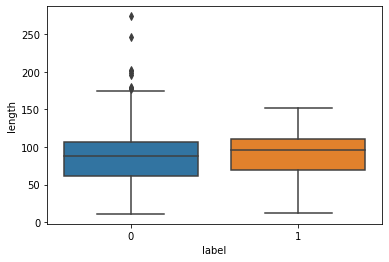

In [13]:
sns.boxplot(x = tweet['label'], y=tweet['length'])

In [14]:
tweet.shape

(31962, 3)

In [15]:
tweet = tweet[tweet['length']<225]

In [16]:
tweet.shape

(31960, 3)

In [17]:
tweet.head()

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39


**Text preprocessing**

In [18]:
tweet['tweet'] = tweet['tweet'].str.replace('[^a-zA-Z]',' ')

tweet['tweet'].head()

0      user when a father is dysfunctional and is s...
1     user  user thanks for  lyft credit i can t us...
2                                  bihday your majesty
3     model   i love u take with u all the time in ...
4               factsguide  society now     motivation
Name: tweet, dtype: object

In [19]:
tweet['tweet'] = tweet['tweet'].apply(lambda x: x.lower())
tweet.head()

,label,tweet,length
0,0,user when a father is dysfunctional and is s...,102
1,0,user user thanks for lyft credit i can t us...,122
2,0,bihday your majesty,21
3,0,model i love u take with u all the time in ...,86
4,0,factsguide society now motivation,39


In [20]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [21]:
tweet['tweet'] = tweet['tweet'].apply(lambda x: x.split())

tweet['tweet'].head()

0    [user, when, a, father, is, dysfunctional, and...
1    [user, user, thanks, for, lyft, credit, i, can...
2                              [bihday, your, majesty]
3    [model, i, love, u, take, with, u, all, the, t...
4               [factsguide, society, now, motivation]
Name: tweet, dtype: object

In [22]:
tweet['tweet'] = tweet['tweet'].apply(lambda x: [w.strip() for w in x])

tweet.head()

,label,tweet,length
0,0,"[user, when, a, father, is, dysfunctional, and...",102
1,0,"[user, user, thanks, for, lyft, credit, i, can...",122
2,0,"[bihday, your, majesty]",21
3,0,"[model, i, love, u, take, with, u, all, the, t...",86
4,0,"[factsguide, society, now, motivation]",39


In [23]:
tweet['tweet'] = tweet['tweet'].apply(lambda x: [w for w in x if w not in stop])

tweet['tweet'].head()

0    [user, father, dysfunctional, selfish, drags, ...
1    [user, user, thanks, lyft, credit, use, cause,...
2                                    [bihday, majesty]
3                  [model, love, u, take, u, time, ur]
4                    [factsguide, society, motivation]
Name: tweet, dtype: object

**Word Cloud**

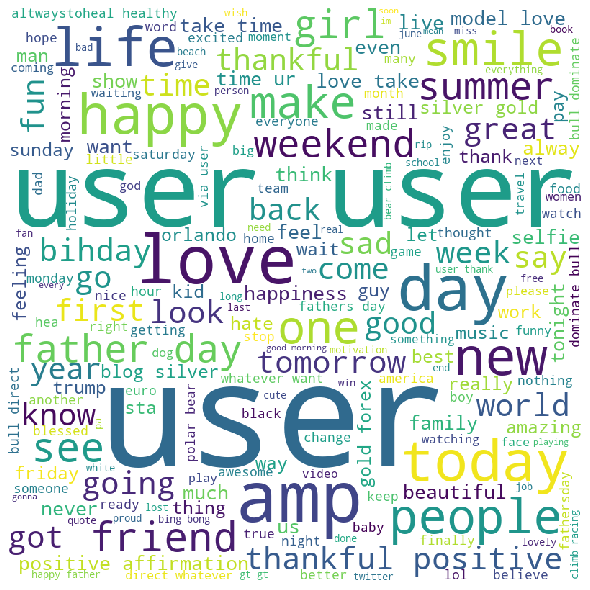

In [24]:
all_words = ''

for i in tweet['tweet']:
    all_words += ' '.join(i) + ' '
    
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white').generate(all_words)
    
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

*USER* word is providing no significant information

In [25]:
tweet['tweet'] = tweet['tweet'].apply(lambda x: [w for w in x if w not in ['user']])

tweet['tweet'].head()

0    [father, dysfunctional, selfish, drags, kids, ...
1    [thanks, lyft, credit, use, cause, offer, whee...
2                                    [bihday, majesty]
3                  [model, love, u, take, u, time, ur]
4                    [factsguide, society, motivation]
Name: tweet, dtype: object

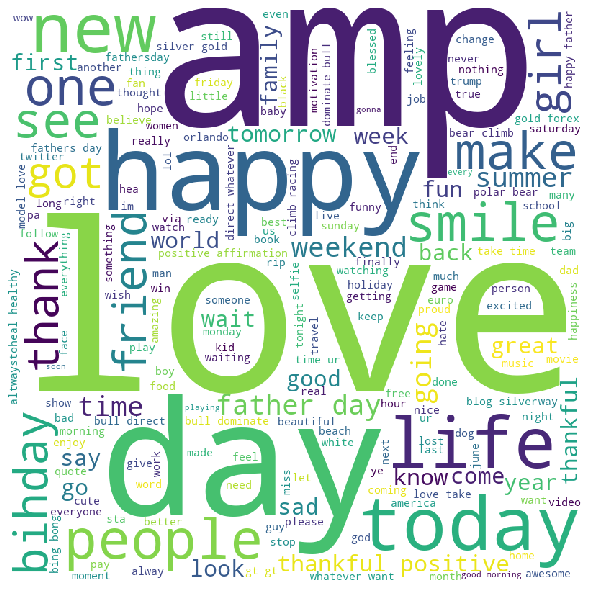

In [26]:
all_words = ''

for i in tweet['tweet']:
    all_words += ' '.join(i) + ' '
    
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white').generate(all_words)
    
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [27]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

tweet['tweet'] = tweet['tweet'].apply(lambda x: [lemmatizer.lemmatize(w) for w in x])
 
tweet['tweet'].head()

0    [father, dysfunctional, selfish, drag, kid, dy...
1    [thanks, lyft, credit, use, cause, offer, whee...
2                                    [bihday, majesty]
3                  [model, love, u, take, u, time, ur]
4                    [factsguide, society, motivation]
Name: tweet, dtype: object

In [28]:
tweet['tweet'] = tweet['tweet'].apply(lambda x: ' '.join(x))

tweet['tweet'].head()

0    father dysfunctional selfish drag kid dysfunct...
1    thanks lyft credit use cause offer wheelchair ...
2                                       bihday majesty
3                          model love u take u time ur
4                        factsguide society motivation
Name: tweet, dtype: object

In [29]:
tweet.shape

(31960, 3)

In [30]:
tweet.drop_duplicates()

tweet.shape

(31960, 3)

In [31]:
tweet.dropna()

tweet.shape

(31960, 3)

**Bag of Words**

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

bow_model = CountVectorizer().fit(tweet['tweet'])
bow_tweets = bow_model.transform(tweet['tweet'])

In [33]:
bow_tweets

<31960x35102 sparse matrix of type '<class 'numpy.int64'>'
	with 233349 stored elements in Compressed Sparse Row format>

In [34]:
len(bow_model.vocabulary_)

35102

In [35]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(bow_tweets, tweet['label'], test_size=0.25,random_state=44)



In [36]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

mnb.fit(x_train, y_train)

predictions = mnb.predict(x_test)


In [37]:
from sklearn.metrics import classification_report, accuracy_score

print('classification report \n: ', classification_report(y_test,predictions))
print('accuracy : ', accuracy_score(y_test,predictions))

classification report 
:                precision    recall  f1-score   support

           0       0.97      0.97      0.97      7458
           1       0.62      0.59      0.61       532

    accuracy                           0.95      7990
   macro avg       0.80      0.78      0.79      7990
weighted avg       0.95      0.95      0.95      7990

accuracy :  0.9486858573216521
